<a href="https://colab.research.google.com/github/amanm063/JUPYTER-NOTEBOOK-DATA-SCIENCE-BEGINNING/blob/master/cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

here is the link to the dataset
https://www.kaggle.com/abrahamanderson/cancer-classification/version/1

In [ ]:
df=pd.read_csv("cancer_classification.csv")

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

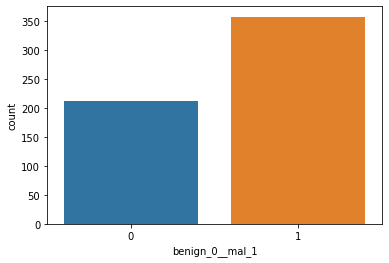

In [ ]:
sns.countplot(x="benign_0__mal_1",data=df)

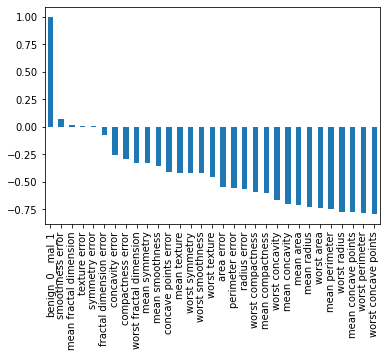

In [ ]:
df.corr()["benign_0__mal_1"].sort_values(ascending=False).plot(kind="bar")

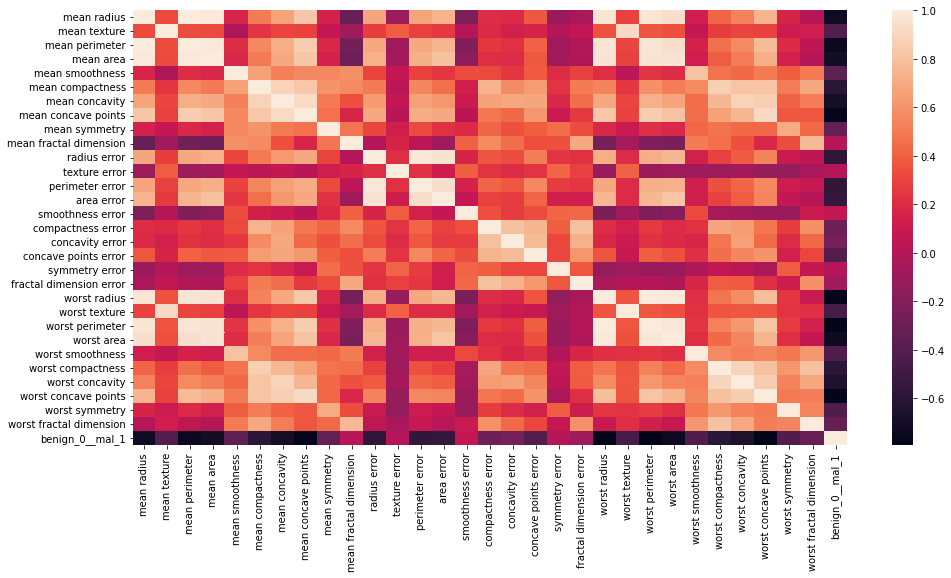

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("benign_0__mal_1",axis=1).values
y = df["benign_0__mal_1"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.fit_transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(381, 30)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
12/12 [==============================] - 1s 31ms/step - loss: 0.6791 - val_loss: 0.6770
Epoch 2/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6486 - val_loss: 0.6373
Epoch 3/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6154 - val_loss: 0.5959
Epoch 4/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5770 - val_loss: 0.5543
Epoch 5/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5342 - val_loss: 0.5122
Epoch 6/600
12/12 [==============================] - 0s 5ms/step - loss: 0.4915 - val_loss: 0.4684
Epoch 7/600
12/12 [==============================] - 0s 5ms/step - loss: 0.4463 - val_loss: 0.4223
Epoch 8/600
12/12 [==============================] - 0s 4ms/step - loss: 0.4030 - val_loss: 0.3795
Epoch 9/600
12/12 [==============================] - 0s 4ms/step - loss: 0.3650 - val_loss: 0.3455
Epoch 10/600
12/12 [==============================] - 0s 4ms/step - loss: 0.3308 - val_loss: 0.3209
Epoch 11

In [ ]:
loss = pd.DataFrame(model.history.history)

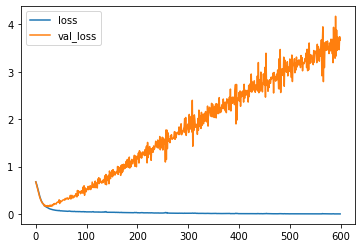

In [ ]:
loss.plot()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model2 = Sequential()
model2.add(Dense(30, activation="relu"))
model2.add(Dense(15, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
early = EarlyStopping(monitor="val_loss",mode="min",verbose=2,patience=25) 

In [ ]:
model2.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early])

Epoch 1/600
12/12 [==============================] - 1s 15ms/step - loss: 0.6781 - val_loss: 0.6539
Epoch 2/600
12/12 [==============================] - 0s 4ms/step - loss: 0.6400 - val_loss: 0.6119
Epoch 3/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6090 - val_loss: 0.5788
Epoch 4/600
12/12 [==============================] - 0s 4ms/step - loss: 0.5779 - val_loss: 0.5455
Epoch 5/600
12/12 [==============================] - 0s 5ms/step - loss: 0.5456 - val_loss: 0.5100
Epoch 6/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5097 - val_loss: 0.4660
Epoch 7/600
12/12 [==============================] - 0s 4ms/step - loss: 0.4679 - val_loss: 0.4254
Epoch 8/600
12/12 [==============================] - 0s 5ms/step - loss: 0.4268 - val_loss: 0.3847
Epoch 9/600
12/12 [==============================] - 0s 6ms/step - loss: 0.3874 - val_loss: 0.3441
Epoch 10/600
12/12 [==============================] - 0s 4ms/step - loss: 0.3531 - val_loss: 0.3097
Epoch 11

In [ ]:
loss2 = pd.DataFrame(model2.history.history)

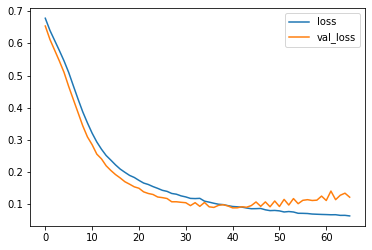

In [ ]:
loss2.plot()

In [ ]:
model3 = Sequential()
model3.add(Dense(30, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(15, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation="sigmoid"))

model3.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
model3.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early])

Epoch 1/600
12/12 [==============================] - 1s 16ms/step - loss: 0.6975 - val_loss: 0.6842
Epoch 2/600
12/12 [==============================] - 0s 4ms/step - loss: 0.6898 - val_loss: 0.6725
Epoch 3/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6735 - val_loss: 0.6534
Epoch 4/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6674 - val_loss: 0.6314
Epoch 5/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6508 - val_loss: 0.6151
Epoch 6/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6320 - val_loss: 0.5964
Epoch 7/600
12/12 [==============================] - 0s 4ms/step - loss: 0.6292 - val_loss: 0.5755
Epoch 8/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6158 - val_loss: 0.5503
Epoch 9/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5938 - val_loss: 0.5298
Epoch 10/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5586 - val_loss: 0.4983
Epoch 11

In [ ]:
loss3 = pd.DataFrame(model3.history.history)

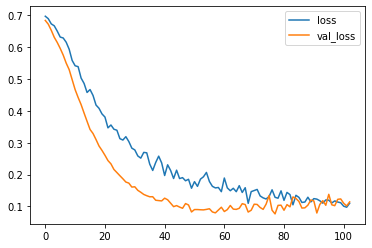

In [ ]:
loss3.plot()

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        67
           1       1.00      0.60      0.75       121

    accuracy                           0.74       188
   macro avg       0.79      0.80      0.74       188
weighted avg       0.85      0.74      0.75       188



In [ ]:
print(confusion_matrix(y_test,predictions))

[[67  0]
 [48 73]]
